In [1]:
# library(tidyverse)
library(ggplot2)

### Q0

* Draw a concepts diagram that uses all the following terminology covered in this module

* Probability mass function, outcome, expriment, sample space, Gaussian, probanility mass funciton, probability distribution, binomial, maximum likelihood, parameters, mean and variance, lambda, sample, p-value

In [1]:
### Write your code here



###  Q1
Write a function that returns the sample space for the experiment consisting of samplign a 4 digit PIN
  * Call your function get_all_perms

  * Essentially, your function does not take any arguments but returns the sample space consisting of all the four digit numbers
   
  * The function `expand.grid` expand.grid creates a data frame from all combinations of the supplied vectors or factors. For example:
 
  ```expand.grid(0:1, 0:1, 0:1)```

* generates  

![](https://www.dropbox.com/s/cnlt4fg8rxd01d6/expand.grid.png?dl=1)
 

* Strategy, use `expand.grid` to generate the permutation for four verctation in the range 0:9
  * Return the number of rows in that `data.frame`

  

In [2]:
### Write your code here
grid<- expand.grid(0:9,0:9,0:9,0:9)
get_all_perms <- function() {
  (nrow(grid))
}

In [3]:
# Running this should return 10,000
get_all_perms()

[1] 10000

###  Q2

The function above is not very useful since it always computes the same thing, namely the number of possible permutation of digits. One way to make it more useful is by passing as an argument the number of digits to consider, i.e., the number of columns in `expand.grid`. Let;s call that param `size`, which by default should be `4`. For exmaple:

*  `get_all_perms(size = 1 )` will return all the number of size 1 (0-9)
*  `get_all_perms(size = 3 )` will return all the permutations of size 3 (000 - to 999)


* Hint: `expand.grid` requires the number of input parameters to match the permutation length. We need to automate that so that the number of vectors passed as input matches the `size` values passed into `get_all_perms`
  * We can do that using `replicate`
  * `replicate(2, c(1,2,3), simplify=FALSE)` will repeat the vector `c(1,2,3)` twice
    * We need to pass `replicate` the value `simplify=FALSE` so that it does not convert the output for us into a matrix
  * Use pipe (`%>%`) pass the output of `replicate` into expand.grid
  * Make sure replicated generate the correct input for exand.grid
  

In [4]:
### Write your code here

get_all_perms <- function(size) {
  grid<- expand.grid(replicate(size,c(0:9),simplify=FALSE))
    print(grid)
    nrow(grid)
}



In [5]:
get_all_perms(size = 1)
get_all_perms(size = 3)


   Var1
1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9


[1] 10

     Var1 Var2 Var3
1       0    0    0
2       1    0    0
3       2    0    0
4       3    0    0
5       4    0    0
6       5    0    0
7       6    0    0
8       7    0    0
9       8    0    0
10      9    0    0
11      0    1    0
12      1    1    0
13      2    1    0
14      3    1    0
15      4    1    0
16      5    1    0
17      6    1    0
18      7    1    0
19      8    1    0
20      9    1    0
21      0    2    0
22      1    2    0
23      2    2    0
24      3    2    0
25      4    2    0
26      5    2    0
27      6    2    0
28      7    2    0
29      8    2    0
30      9    2    0
31      0    3    0
32      1    3    0
33      2    3    0
34      3    3    0
35      4    3    0
36      5    3    0
37      6    3    0
38      7    3    0
39      8    3    0
40      9    3    0
41      0    4    0
42      1    4    0
43      2    4    0
44      3    4    0
45      4    4    0
46      5    4    0
47      6    4    0
48      7    4    0
49      8    4    0


[1] 1000

###  Q3

* Given a fish disease that occurs with a probability of p= 0.43
* You sampled 340 animals
* How many of these animals should you expect to see the disease in?
* Hint: you will need to compute the probability of each element of the sample space and find the value that has the highest probability

In [18]:
### Write your code here
exp_disease<- rbinom(n = 340,size = 1,prob = 0.43)
sum(exp_disease)

[1] 143

### Q4
Plot the two following distributions:

$$
x \sim \mathcal{N}(10, 0.5) \\
y \sim \mathcal{N}(10.2, 0.5) \\
$$

* Your plot should look like the following
![](https://www.dropbox.com/s/psrjtl6abjla7z5/sample_gaussian_plot.png?dl=1)


* Draw 40 values from the first distribution and store them in a variable called `x_sample`
* Draw 40 values from the second distribution and store them in a variable called `y_sample`
  * make sure you run the following line before you sample data
  ```set.seed(42)```
 
* Do a `t-`test to compute the `x_sample` and `y_sample`
  * A `t-`test compares two vectors of values and predicts if the two vectors are from the same distribution
  * The format for the t-test in R is
 
 `t.test(x,y)` where `x` an `y` are the vectors of values we would like to compare.
  * Look at the `p-value`, if it's smaller than say 0.05, then there is a statistically significant difference between the two datasets.

* Do you agree with the conclusion of the `t-test`. In other words, would you be comfortable reporting in a publication that the data in `x_sample` and `y_sample` are statistically different?

In [6]:
rnorm(20,10,0.5)

[1]  9.906479 10.261006  9.865097 10.263543 11.208072 10.022589 10.328455
 [8] 10.191146 10.999253 10.055702 10.223311 10.086863 10.585183 10.302238
[15] 10.951889 10.329897  9.591704 10.197386 10.885726  8.960842

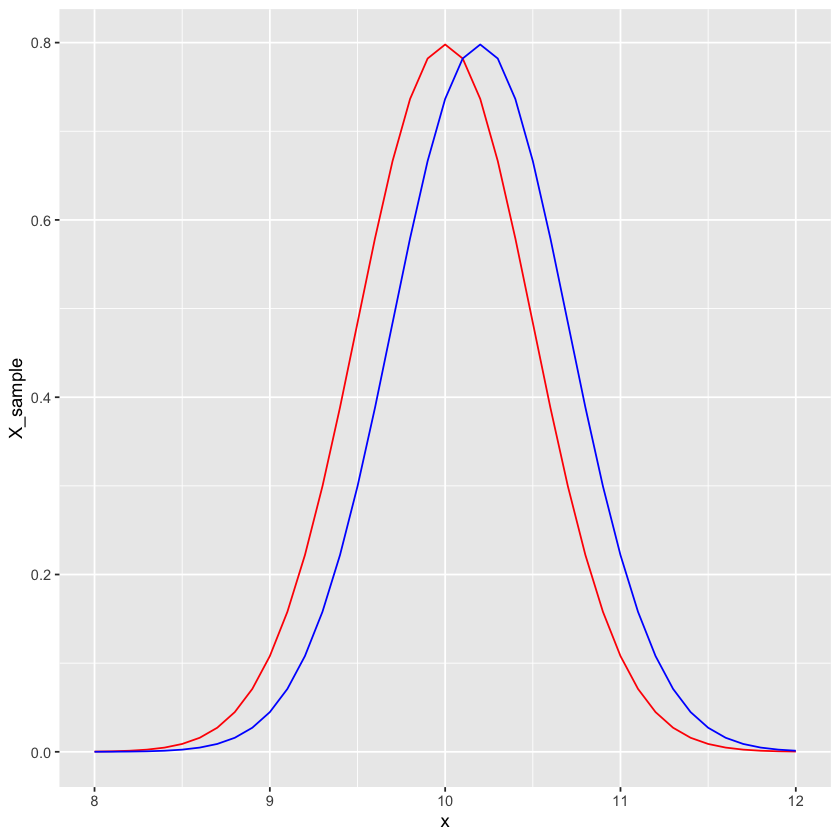

In [7]:
# Write the code to draw the plot here
set.seed(42)

x<-seq(8,12,0.1)

X_sample<- dnorm(x,10,0.5)
Y_sample<- dnorm(x,10.2,0.5)
df<- data.frame(X_sample,Y_sample)

ggplot(data=df,aes(x=x))+
    geom_line(aes(y=X_sample), color = 'red')+
    geom_line(aes(y=Y_sample), color = 'blue')

In [8]:
# Write the code to run your t-test here
set.seed(42)
x_sample <- rnorm(40,10,0.5)
y_sample <- rnorm(40,10.2,0.5)

t.test(x_sample,y_sample)


	Welch Two Sample t-test

data:  x_sample and y_sample
t = -2.1504, df = 72.3, p-value = 0.03486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.50040708 -0.01897381
sample estimates:
mean of x mean of y 
 9.980232 10.239922 


Answer: 

Yes the results from the t-test show that there is a significant difference in the dataset. 

### Q5

* We have used the function `dnorm` to plot the bell-shaped curve for a distribution $ x \sim \mathcal{N}(10, 0.5)$
  * Use seq(8, 12, 0.1) to generate the x-axis values
  * The pdf should look like the following

![](https://www.dropbox.com/s/jl2c2atpkxze7ev/sample_pdf_sum_question.png?dl=1)

* Use `dnorm` to compute the probability density for each point along the $x-$axis generated using `seq()` above
  * What do you notice? Hint, sum the values obtained
  


[1] 9.999599

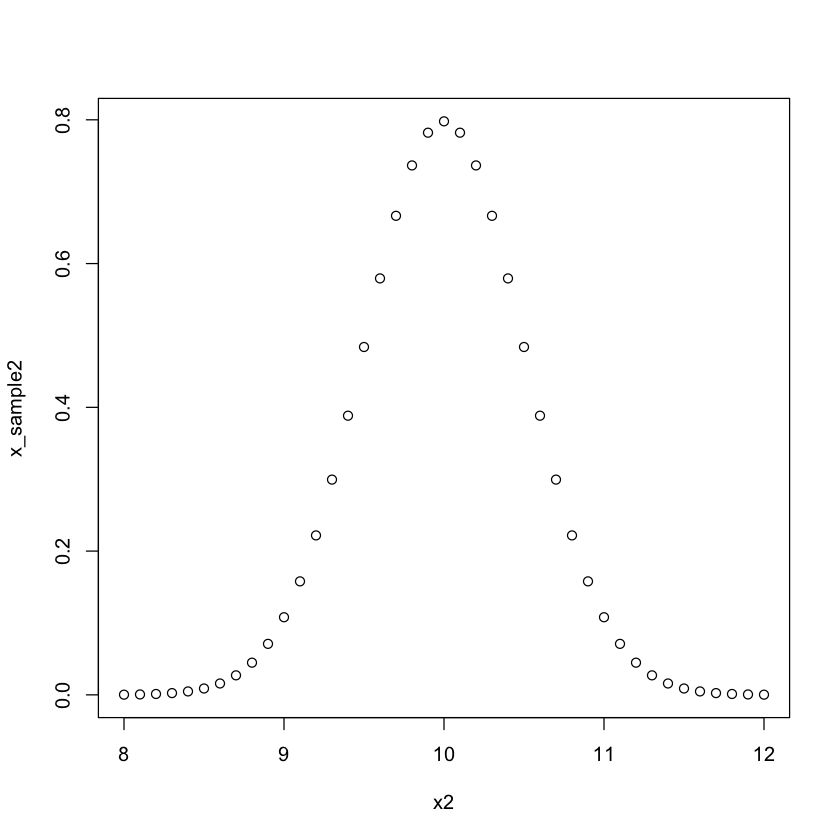

In [9]:
# Write the code to run your t-test here
x2<- seq(8,12,0.1)

x_sample2<- dnorm(x,10,0.5)
plot(x2,x_sample2)

sum(x_sample2)


### Q6 Optional Challenge

What transformation can you carry out to tranform the value to actual probabilities, i.e., values that sum to 1.  Write code to test whether your hypothesis works.

In [ ]:
# Write the code here

In [1]:
set.seed(42)
rnorm(1, 10, 1)

[1] 11.37096

In [2]:
rnorm(1, 10, 1)

[1] 9.435302

In [3]:
rnorm(1, 10, 1)

[1] 10.36313

In [4]:
set.seed(42)

In [5]:
rnorm(1, 10, 1)

[1] 11.37096

In [6]:
rnorm(1, 10, 1)

[1] 9.435302